# **Challenge**

## **Objectives**

1. Find the most frequently reported noncriminal activity
2. Find the day of the week with the most reported crime

In [1]:
from pyspark import *
from pyspark.sql.functions import *

from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [2]:
spark = (
    SparkSession
    .builder
    .getOrCreate()
)

In [3]:
path = "/home/jovyan/work/data/reported-crimes.csv"

rc = (
    spark
    .read
    .csv(path,header=True)
    .withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a'))
    .filter(col('Date') <= lit('2018-11-11'))
)

### **Objective 1**

In [14]:
rc.select(col('Primary Type')).distinct().show(50,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|CRIMINAL SEXUAL ASSAULT          |
|STALKING                         |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|ARSON                            |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|NON - CRIMINAL                   |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|PUBLIC INDECENCY                 |
|CRIM SEXUAL ASSAULT              |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|PROSTITUTION                     |
|DECEPTIVE PRACTICE               |
|CONCEALED CARRY LICENSE VIOLATION|
|SEX OFFENSE                      |
|CRIMINAL DAMAGE                  |
|NARCOTICS                  

In [39]:
rc_noncrim = (
    rc.filter((col('Primary Type') == 'NON-CRIMINAL') | 
              (col('Primary Type') == 'NON - CRIMINAL') | 
              (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))
             )
rc_noncrim.show(30)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10233370|   HY421530|2015-09-13 10:45:00|  010XX S MENARD AVE|5114|      NON - CRIMINAL|   FOID - REVOCATION|           RESIDE

In [40]:
(
    rc_noncrim
    .groupBy('Description')
    .count()
    .orderBy('count',ascending=False)
    .show(10,truncate=False)
)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |28   |
|FOID - REVOCATION                          |24   |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|2    |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |2    |
|FOUND PASSPORT                             |1    |
+-------------------------------------------+-----+



### **Objective 2**

In [47]:
cr_on_week = (
    rc
    .withColumn('day_of_week', date_format(col("Date"), "EEEE"))
    .groupBy('day_of_week')
    .count()
    .orderBy('count',ascending=False)
)
cr_on_week.show(truncate=False)

+-----------+-----+
|day_of_week|count|
+-----------+-----+
|Friday     |48959|
|Saturday   |47424|
|Thursday   |46988|
|Monday     |46981|
|Wednesday  |45984|
|Sunday     |45716|
|Tuesday    |45375|
+-----------+-----+



In [49]:
#import pandas as pd

df = cr_on_week.toPandas()
df.head()

,day_of_week,count
0,Friday,48959
1,Saturday,47424
2,Thursday,46988
3,Monday,46981
4,Wednesday,45984


Text(0.5, 1.0, 'No. of reported crimes per day of week')

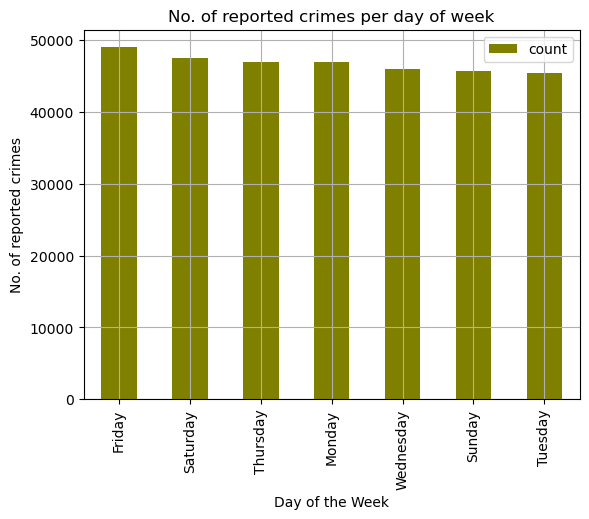

In [56]:
import matplotlib.pyplot as plt

df.plot(kind='bar',color='olive',x='day_of_week',y='count',grid=True)
plt.xlabel('Day of the Week')
plt.ylabel('No. of reported crimes')
plt.title('No. of reported crimes per day of week')